In [1]:
# Importing librairies
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset
import ast

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = pd.DataFrame(dataset['train'])

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills : ast.literal_eval(skills) if pd.notna(skills) else skills)

LET'S COPY THE CODES OF THE SECTION 19_exercice AND 17_matplotlib_histograms, AND STYLING WITH SEABORN TO SEE THE DIFFERENCES

In [2]:
import seaborn as sns

In [3]:
# Filter for data analysts
df_da_us = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

# Remove NaN values from the 'salary_year_avg' column for accurate vizualisation
df_da_us = df_da_us.dropna(subset=['salary_year_avg'])

C:\Users\Fils GUEDEGBE\AppData\Local\Temp\ipykernel_11880\1356837856.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['${:,.0f}k'.format(x/1000) for x in ax[0].get_xticks()])
C:\Users\Fils GUEDEGBE\AppData\Local\Temp\ipykernel_11880\1356837856.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['${:,.0f}k'.format(x/1000) for x in ax[1].get_xticks()])


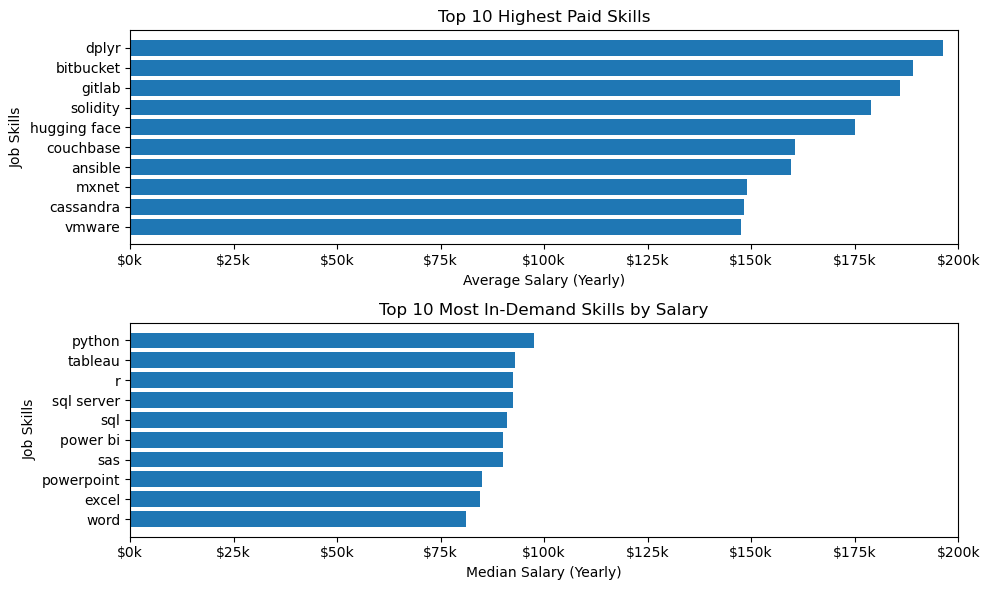

In [ ]:
# Explode the 'job_skills' column to create rows for each skill
df_exploded = df_da_us.explode('job_skills')
fig, ax = plt.subplots(2, 1, figsize=(10, 6))

### TOP SKILLS BASED ON SALARY
# Calculate the average salaries by skill
salary_by_skill = df_exploded.groupby('job_skills')['salary_year_avg'].median().reset_index()
# Get the top 10 highest paid skills
top_paid_skills = salary_by_skill.nlargest(10, 'salary_year_avg')

# Create the plot
ax[0].barh(top_paid_skills['job_skills'], top_paid_skills['salary_year_avg'])
# Set the title and axis labels
ax[0].set_title('Top 10 Highest Paid Skills')
ax[0].set_xlabel('Average Salary (Yearly)')
ax[0].set_ylabel('Job Skills')
ax[0].set_xlim(right=200000)
# Format the x-axis values as dollar amounts
ax[0].set_xticklabels(['${:,.0f}k'.format(x/1000) for x in ax[0].get_xticks()])
ax[0].invert_yaxis()  # Invert the y-axis for the first plot

### TOP SKILLS BASED ON COUNT, BUT PLOTTING ON SALARIES
# Get the top 10 most in-demand skills by median salary
top_demanded_skills = df_exploded['job_skills'].value_counts().head(10).index.tolist()
# Create a new DataFrame with only the top 10 top skills
df_skills = df_exploded[df_exploded['job_skills'].isin(top_demanded_skills)][['job_skills', 'salary_year_avg']]
# Calculate the median salaries by skill
median_salaries = df_skills.groupby('job_skills')['salary_year_avg'].median().reset_index()
median_salaries.sort_values(by='salary_year_avg', ascending=False, inplace=True)
# Create the plot
ax[1].barh(median_salaries['job_skills'], median_salaries['salary_year_avg'])
# Set the title and axis labels
ax[1].set_title('Top 10 Most In-Demand Skills by Salary')
ax[1].set_xlabel('Median Salary (Yearly)')
ax[1].set_ylabel('Job Skills')
ax[1].set_xlim(right=200000)
# Format the x-axis values as dollar amounts
ax[1].set_xticklabels(['${:,.0f}k'.format(x/1000) for x in ax[1].get_xticks()])
ax[1].invert_yaxis()  # Invert the y-axis for the second plot

# Display the plot
plt.tight_layout()
plt.show()

STYLING WITH SEABORN

C:\Users\Fils GUEDEGBE\AppData\Local\Temp\ipykernel_11880\3199008097.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Fils GUEDEGBE\AppData\Local\Temp\ipykernel_11880\3199008097.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend().remove()
C:\Users\Fils GUEDEGBE\AppData\Local\Temp\ipykernel_11880\3199008097.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['${:,.0f}k'.format(x/1000) for x in ax[0].get_xticks()])
C:\Users\Fils GUEDEGBE\AppData\Local\Temp\ipykernel_11880\3199008097.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed 

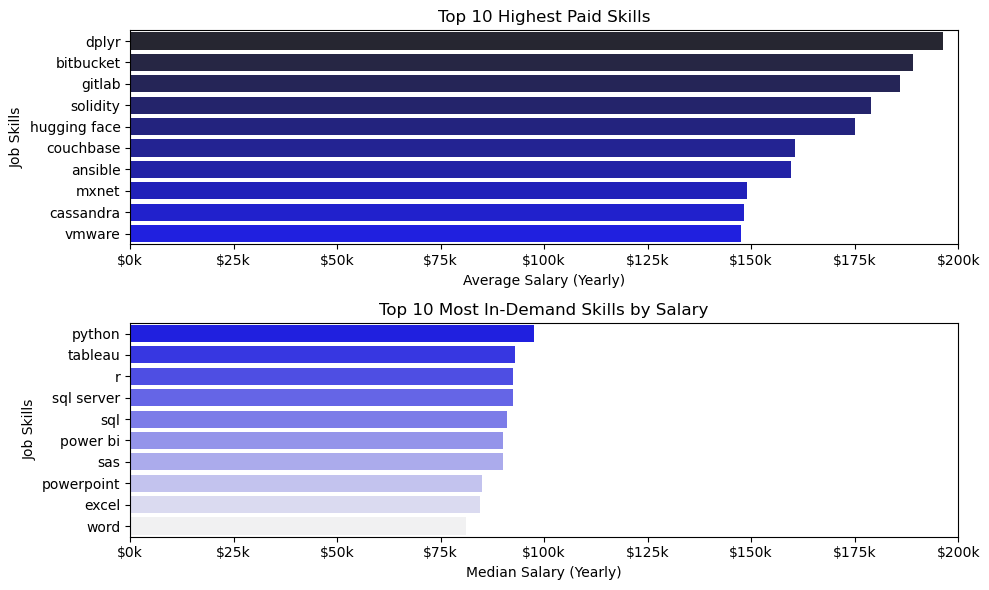

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(10, 6))

# Create the plot with Seaborn and specify the order
sns.barplot(
    x='salary_year_avg', y='job_skills', 
    data=top_paid_skills, ax=ax[0], 
    palette='dark:b'
)
# Set the title and axis labels
ax[0].set_title('Top 10 Highest Paid Skills')
ax[0].set_xlabel('Average Salary (Yearly)')
ax[0].set_ylabel('Job Skills')
ax[0].set_xlim(right=200000)
ax[0].legend().remove()
# Format the x-axis values as dollar amounts
ax[0].set_xticklabels(['${:,.0f}k'.format(x/1000) for x in ax[0].get_xticks()])

### TOP SKILLS BASED ON COUNT
# Get the top 10 most in-demand skills by median salary
top_demanded_skills = df_exploded['job_skills'].value_counts().head(10).index.tolist()
# Create a new DataFrame with only the top 10 top skills
df_skills = df_exploded[df_exploded['job_skills'].isin(top_demanded_skills)][['job_skills', 'salary_year_avg']]
# Calculate the median salaries by skill
median_salaries = df_skills.groupby('job_skills')['salary_year_avg'].median().reset_index()
median_salaries.sort_values(by='salary_year_avg', ascending=False, inplace=True)

# Create the plot with Seaborn and specify the order
sns.barplot(
    x='salary_year_avg', y='job_skills', 
    data=median_salaries, ax=ax[1], 
    palette='light:b_r'
)
# Set the title and axis labels
ax[1].set_title('Top 10 Most In-Demand Skills by Salary')
ax[1].set_xlabel('Median Salary (Yearly)')
ax[1].set_ylabel('Job Skills')
ax[1].set_xlim(right=200000)
ax[1].legend().remove()
# Format the x-axis values as dollar amounts
ax[1].set_xticklabels(['${:,.0f}k'.format(x/1000) for x in ax[1].get_xticks()])

# Display the plot
plt.tight_layout()
plt.show()

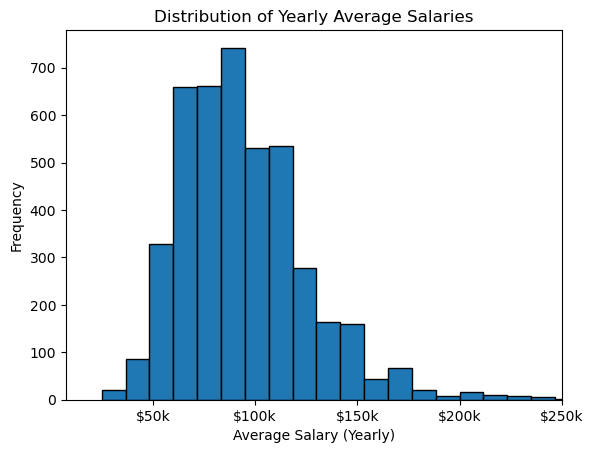

In [6]:
from matplotlib.ticker import FuncFormatter

# formatting function to convert values ​​to thousands with a 'k'
def format_salary(value, _):
    return f'${value/1000:.0f}k'

ax = df_da_us['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Distribution of Yearly Average Salaries')
plt.xlabel('Average Salary (Yearly)')
plt.ylabel('Frequency')

# Apply x-axis formatting
ax.xaxis.set_major_formatter(FuncFormatter(format_salary))
ax.set_xlim(right=250000)

plt.show()

TO GET A HISTOGRAM WITH SMOOTHER EDGES, WE CAN REPLACE THE HISTOGRAM WITH A DENSITY PLOT. SEABORN OFFERS A SNS.KDEPLOT() FUNCTION THAT GENERATES A SMOOTHED DENSITY CURVE.

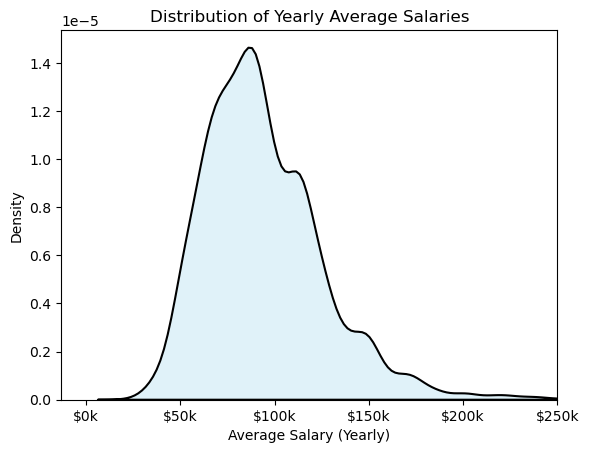

In [7]:
from matplotlib.ticker import FuncFormatter

# Formatting function to convert values to thousands with a 'k'
def format_salary(value, _):
    return f'${value/1000:.0f}k'

# Create a density plot with Seaborn
fig, ax = plt.subplots()
sns.kdeplot(
    df_da_us['salary_year_avg'], 
    fill=True, color="skyblue", edgecolor="black", 
    linewidth=1.5, ax=ax
)

# Add titles and labels
plt.title('Distribution of Yearly Average Salaries')
plt.xlabel('Average Salary (Yearly)')
plt.ylabel('Density')

# Apply x-axis formatting
ax.xaxis.set_major_formatter(FuncFormatter(format_salary))
ax.set_xlim(right=250000)

# Show the plot
plt.show()
